In [ ]:
# !pip install arabic-reshaper

### Load packages

In [1]:
### Load packages
import arabic_reshaper
from bidi.algorithm import get_display
import numpy as np
import scipy.stats as stats
import seaborn as sns
#import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### 1. Load the data

### 1. Load the data

---


In [2]:
df=pd.read_csv('./dataset/Academy Full Pack clean.csv' , encoding = "UTF-8")

In [3]:
df= df.drop(columns=['Unnamed: 0'])
df.columns

Index(['course_id', 'course_name', 'course_start_date', 'course_end_date',
       'course_category', 'course_type', 'student_name', 'student_id',
       'enrollment_date', 'completed_date', 'completed_flag', 'gender', 'city',
       'education_level', 'job_status', 'studnet_english_level',
       'register_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95623 entries, 0 to 95622
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   course_id              95623 non-null  int64 
 1   course_name            95623 non-null  object
 2   course_start_date      95623 non-null  object
 3   course_end_date        95623 non-null  object
 4   course_category        95623 non-null  object
 5   course_type            95623 non-null  object
 6   student_name           95623 non-null  object
 7   student_id             95623 non-null  int64 
 8   enrollment_date        95623 non-null  object
 9   completed_date         28146 non-null  object
 10  completed_flag         95623 non-null  object
 11  gender                 85123 non-null  object
 12  city                   52914 non-null  object
 13  education_level        95623 non-null  object
 14  job_status             19205 non-null  object
 15  studnet_english_lev

In [7]:
rate=pd.read_csv('./dataset/rate clean.csv' , encoding = "UTF-8")

In [9]:
intrest=pd.read_csv('./dataset/intrest clean.csv' , encoding = "UTF-8")

###  Check for the datatypes of each column
---

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95623 entries, 0 to 95622
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   course_id              95623 non-null  int64 
 1   course_name            95623 non-null  object
 2   course_start_date      95623 non-null  object
 3   course_end_date        95623 non-null  object
 4   course_category        95623 non-null  object
 5   course_type            95623 non-null  object
 6   student_name           95623 non-null  object
 7   student_id             95623 non-null  int64 
 8   enrollment_date        95623 non-null  object
 9   completed_date         28146 non-null  object
 10  completed_flag         95623 non-null  object
 11  gender                 85123 non-null  object
 12  city                   52914 non-null  object
 13  education_level        95623 non-null  object
 14  job_status             19205 non-null  object
 15  studnet_english_lev

In [12]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185201 entries, 0 to 185200
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   student_id   185201 non-null  int64 
 1   question     185200 non-null  object
 2   answer       185200 non-null  object
 3   submit_date  185201 non-null  object
 4   course_id    185201 non-null  int64 
 5   course_name  185201 non-null  object
 6   rate_score   185201 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 9.9+ MB


In [13]:
intrest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56175 entries, 0 to 56174
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   student_id  56175 non-null  int64 
 1   intrest     56175 non-null  object
dtypes: int64(1), object(1)
memory usage: 877.9+ KB


---

### K-means clustering

In [26]:
df_sub =df[['student_id','course_id','course_name','course_category','course_type']]
df_sub2 =pd.merge(df_sub,rate , on=['student_id' ,'course_id'])
df_sub2=df_sub2.drop(columns=['question', 'answer','submit_date','course_name_y'])
df_sub3=pd.merge(df_sub2,intrest , on=['student_id'])
#df_sub3=df_sub3.drop(columns=['question', 'answer','submit_date','course_name_y'])
df_sub3.head()

,student_id,course_id,course_name_x,course_category,course_type,rate_score,intrest
0,1509,35,إدارة الأداء المالي بفعالية - مرحلة الإنطلاقة,مالية واستثمار,مادة إلكترونية,5,التمويل
1,1509,35,إدارة الأداء المالي بفعالية - مرحلة الإنطلاقة,مالية واستثمار,مادة إلكترونية,5,فرص الأعمال
2,1509,35,إدارة الأداء المالي بفعالية - مرحلة الإنطلاقة,مالية واستثمار,مادة إلكترونية,5,النمو
3,1509,35,إدارة الأداء المالي بفعالية - مرحلة الإنطلاقة,مالية واستثمار,مادة إلكترونية,5,تسهيل الأعمال
4,1509,35,إدارة الأداء المالي بفعالية - مرحلة الإنطلاقة,مالية واستثمار,مادة إلكترونية,5,الابتكار


In [28]:
#df_save=df_sub3[['course_id','course_name_x', 'student_id','rate_score']]
df_intrest1 = df_sub3.drop(columns=['course_name_x'])

In [29]:
def func(x):
    if x['intrest'] is np.nan:
        return x
    else:
        intrest =list(map(lambda y: y.strip(), x['intrest'].split(',')))
        for i in intrest:
            x[i] = 1
        return x


df_intrest2 = df_intrest1.apply(func, axis=1)
df_intrest2.head(1)

,course_category,course_id,course_type,intrest,rate_score,student_id,الابتكار,التمكين و التطوير,التمويل,النمو,تسهيل الأعمال,ريادة الأعمال,فرص الأعمال
0,مالية واستثمار,35,مادة إلكترونية,التمويل,5,1509,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [30]:
one_hot = pd.get_dummies(df_intrest2['course_type'])
one_hot[one_hot == 0] = np.nan
df_intrest3 = (df_intrest2
          .drop(columns=['course_type', 'course_category', 'intrest'])
          .join(one_hot, rsuffix='-course_type'))
df_intrest3.head(10)

,course_id,rate_score,student_id,الابتكار,التمكين و التطوير,التمويل,النمو,تسهيل الأعمال,ريادة الأعمال,فرص الأعمال,دورة إفتراضية مباشرة,مادة إلكترونية,ملتقى إلكتروني مباشر
0,35,5,1509,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,35,5,1509,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
2,35,5,1509,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
3,35,5,1509,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
4,35,5,1509,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
5,35,5,1509,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
6,35,5,1509,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN
7,35,5,1509,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
8,35,5,1509,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
9,35,5,1509,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [31]:
#df_sub2=df_sub2.drop(columns=['course_name_x','course_category','course_type'])
#rating_course = pd.merge(df_save,df_intrest3 , on=['course_id'])
#rating_course = df_save.join(df_intrest3.set_index('course_id'),how='outer')
#rating_course = pd.concat([df_sub3,df_intrest3])
#rating_course = rating_course.groupby('course_id')
#rating_course[rating_course['التمويل'].notna()]
rating_course =df_intrest3 
titles= list(rating_course.columns)
titles[1],titles[2]=titles[2],titles[1]
titles[0],titles[1]=titles[1],titles[0]
rating_course=rating_course[titles]
rating_course.head(1)

,student_id,course_id,rate_score,الابتكار,التمكين و التطوير,التمويل,النمو,تسهيل الأعمال,ريادة الأعمال,فرص الأعمال,دورة إفتراضية مباشرة,مادة إلكترونية,ملتقى إلكتروني مباشر
0,1509,35,5,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [32]:
rating_course.loc[rating_course['rate_score'] == -1, 'rate_score'] = 5
rating_course.head()

,student_id,course_id,rate_score,الابتكار,التمكين و التطوير,التمويل,النمو,تسهيل الأعمال,ريادة الأعمال,فرص الأعمال,دورة إفتراضية مباشرة,مادة إلكترونية,ملتقى إلكتروني مباشر
0,1509,35,5,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,1509,35,5,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
2,1509,35,5,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
3,1509,35,5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN
4,1509,35,5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [33]:
attr = df_intrest3.columns.tolist()
attr.remove('course_id')

rating_course[attr] = rating_course[attr].mul(rating_course['rate_score'] , axis=0)
rating_course.head(10)


,student_id,course_id,rate_score,الابتكار,التمكين و التطوير,التمويل,النمو,تسهيل الأعمال,ريادة الأعمال,فرص الأعمال,دورة إفتراضية مباشرة,مادة إلكترونية,ملتقى إلكتروني مباشر
0,7545,35,25,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN
1,7545,35,25,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN
2,7545,35,25,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN
3,7545,35,25,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN
4,7545,35,25,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
5,7545,35,25,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
6,7545,35,25,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN
7,7545,35,25,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN
8,7545,35,25,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN
9,7545,35,25,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN


In [34]:
students= (rating_course
         .drop(columns=['course_id', 'rate_score'])
         .groupby(by='student_id')
         .mean())
students.head()

,الابتكار,التمكين و التطوير,التمويل,النمو,تسهيل الأعمال,ريادة الأعمال,فرص الأعمال,دورة إفتراضية مباشرة,مادة إلكترونية,ملتقى إلكتروني مباشر
student_id,,,,,,,,,,
214,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2.0,NaN
220,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
273,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN
324,NaN,3.0,3.0,3.0,NaN,NaN,3.0,NaN,3.0,NaN
365,1.0,1.0,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN


In [35]:
students = students.fillna(value=0)
students.head()

,الابتكار,التمكين و التطوير,التمويل,النمو,تسهيل الأعمال,ريادة الأعمال,فرص الأعمال,دورة إفتراضية مباشرة,مادة إلكترونية,ملتقى إلكتروني مباشر
student_id,,,,,,,,,,
214,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0
220,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
273,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
324,0.0,3.0,3.0,3.0,0.0,0.0,3.0,0.0,3.0,0.0
365,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


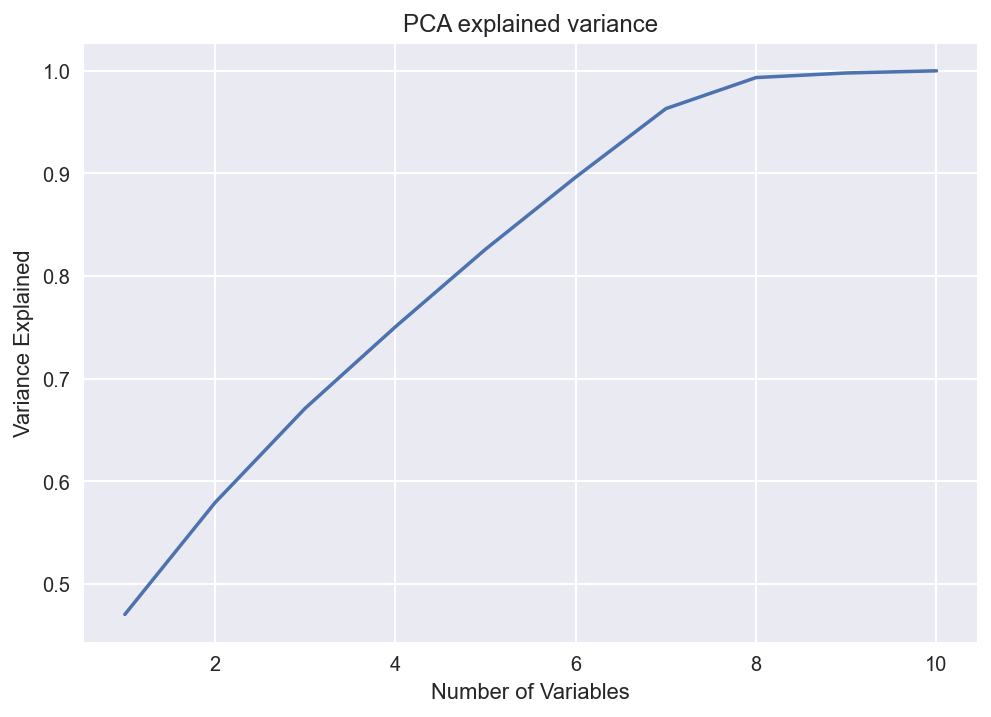

In [36]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(students)
acc_var = np.cumsum(pca.explained_variance_ratio_) 

plt.style.use('seaborn')
plt.plot(range(1, len(acc_var)+1), acc_var)
plt.title('PCA explained variance')
plt.xlabel('Number of Variables')
_ = plt.ylabel('Variance Explained')

In [37]:
number_of_components = 9
pca.set_params(n_components=number_of_components)
pca.fit(students)
students_pca = pca.transform(students)
students_pos_pca = pd.DataFrame(students_pca)
students_pos_pca['student_id'] = students.index
students_pos_pca = students_pos_pca.set_index('student_id')
students_pos_pca.head(1)

,0,1,2,3,4,5,6,7,8
student_id,,,,,,,,,
214,4.551582,1.171092,2.516472,1.198781,1.176179,-0.897858,0.669459,1.052581,-0.214394


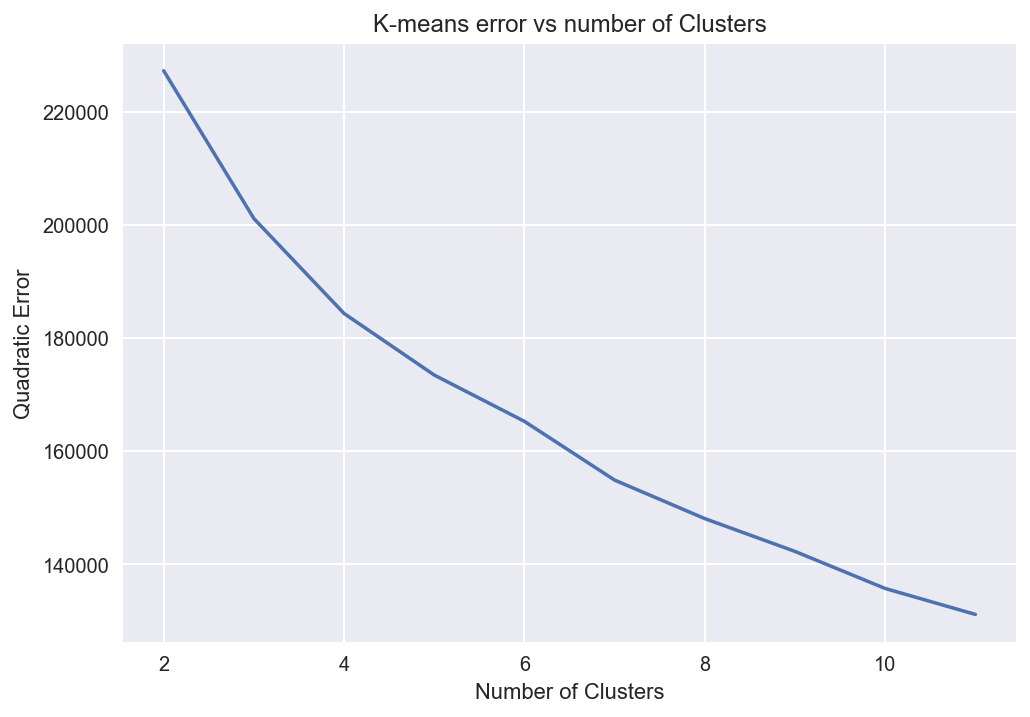

In [38]:
from sklearn.cluster import KMeans
inertia = []
scores = []
for n_clusters in range(2, 12):
    kmeans = KMeans(n_clusters=n_clusters, n_jobs=-1)
    kmeans.fit(students_pos_pca)
    inertia.append(kmeans.inertia_)
plt.plot(range(2, 12), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Quadratic Error')
_ = plt.title('K-means error vs number of Clusters')

In [39]:
#project the users feature vector in 3 dimensions
students_with_label = pd.DataFrame(PCA(n_components=3).fit_transform(students))
students_with_label['student_id'] = students.index
students_with_label = students_with_label.set_index('student_id')

#find each user's cluster
kmeans = KMeans(n_clusters=6, n_init=30, n_jobs=-1)
students_with_label['label'] = kmeans.fit_predict(students_pos_pca)
students_with_label.head()

,0,1,2,label
student_id,,,,
214,4.551582,1.171092,2.516472,3
220,6.166884,1.611825,1.418914,3
273,4.328562,0.750626,0.760150,3
324,2.193158,2.136465,2.055553,5
365,5.108647,-0.052984,0.172251,3


In [40]:
print('Cluster ID     Number of students in cluster')
for idx, val in (pd.get_dummies(students_with_label['label'])).sum().iteritems():
    print(f'{idx}              {val}')

Cluster ID     Number of students in cluster
0              1446
1              2698
2              1058
3              1945
4              1669
5              2083


In [41]:
#df_rate=rate.drop(columns=['question', 'answer', 'submit_date','course_name_x'])
df_rate=rating_course[['student_id','course_id', 'rate_score']]
df_rate.head(1)

,student_id,course_id,rate_score
0,7545,35,25


In [42]:
rating_student = df_rate.join(students_with_label[['label']], on='student_id')
rating_student.loc[rating_student['rate_score'] == -1, 'rate_score'] = np.nan
rating_student[rating_student['label'].notna()]
rating_student.head(1)

,student_id,course_id,rate_score,label
0,7545,35,25.0,1


In [44]:
groups = (rating_student[['course_id', 'rate_score', 'label']]
          .groupby(by=['label', 'course_id'])
          .rate_score.agg(['mean', 'count']))
groups.head(2)

mean  count
label course_id                  
0     34         18.943548    744
      35         19.961489   1558

In [45]:
groups['obj'] = groups['mean']*groups['count']
groups.head()

mean  count      obj
label course_id                           
0     34         18.943548    744  14094.0
      35         19.961489   1558  31100.0
      36         17.988621   1494  26875.0
      37         17.425175    715  12459.0
      46         16.658171    667  11111.0

In [46]:
groups_obj = groups[['obj']].dropna()
groups_obj.head()

obj
label course_id         
0     34         14094.0
      35         31100.0
      36         26875.0
      37         12459.0
      46         11111.0

In [47]:
courses = groups_obj.index.get_level_values(0).unique().tolist()
#Courses = [Courses_Names[i] for i, x in enumerate(Courses_Names) if x not in Courses_Names[i+1:]]
rec = []
for c in courses:
    rec.append(
        groups_obj
        .loc[courses]
        .sort_values(by='obj', ascending=False)
        .reset_index()
        .join(
            df_sub3[['course_name_x', 'course_id']].set_index('course_id'),
            on='course_id')
        ['course_name_x']
        .rename(c)
    )
rec = pd.concat(rec, axis=1)
rec.drop_duplicates().head(10)

,0,1,2,3,4,5
0,الامن السيبراني,الامن السيبراني,الامن السيبراني,الامن السيبراني,الامن السيبراني,الامن السيبراني
1,خطوات تأسيس العمل التجاري,خطوات تأسيس العمل التجاري,خطوات تأسيس العمل التجاري,خطوات تأسيس العمل التجاري,خطوات تأسيس العمل التجاري,خطوات تأسيس العمل التجاري
2,إدارة الأداء المالي بفعالية - مرحلة الإنطلاقة,إدارة الأداء المالي بفعالية - مرحلة الإنطلاقة,إدارة الأداء المالي بفعالية - مرحلة الإنطلاقة,إدارة الأداء المالي بفعالية - مرحلة الإنطلاقة,إدارة الأداء المالي بفعالية - مرحلة الإنطلاقة,إدارة الأداء المالي بفعالية - مرحلة الإنطلاقة
3,التسويق الإلكتروني بأقل التكاليف,التسويق الإلكتروني بأقل التكاليف,التسويق الإلكتروني بأقل التكاليف,التسويق الإلكتروني بأقل التكاليف,التسويق الإلكتروني بأقل التكاليف,التسويق الإلكتروني بأقل التكاليف
5,مقدمة في ريادة الأعمال,مقدمة في ريادة الأعمال,مقدمة في ريادة الأعمال,مقدمة في ريادة الأعمال,مقدمة في ريادة الأعمال,مقدمة في ريادة الأعمال
6,مقدمة في التجارة والتجزئة الالكترونية,مقدمة في التجارة والتجزئة الالكترونية,مقدمة في التجارة والتجزئة الالكترونية,مقدمة في التجارة والتجزئة الالكترونية,مقدمة في التجارة والتجزئة الالكترونية,مقدمة في التجارة والتجزئة الالكترونية
7,سلاسل الإمداد للتجارة الإلكترونية,سلاسل الإمداد للتجارة الإلكترونية,سلاسل الإمداد للتجارة الإلكترونية,سلاسل الإمداد للتجارة الإلكترونية,سلاسل الإمداد للتجارة الإلكترونية,سلاسل الإمداد للتجارة الإلكترونية
8,نمو المنشآت الصغيرة والمتوسطة,نمو المنشآت الصغيرة والمتوسطة,نمو المنشآت الصغيرة والمتوسطة,نمو المنشآت الصغيرة والمتوسطة,نمو المنشآت الصغيرة والمتوسطة,نمو المنشآت الصغيرة والمتوسطة
9,استكشاف ريادة الأعمال,استكشاف ريادة الأعمال,استكشاف ريادة الأعمال,استكشاف ريادة الأعمال,استكشاف ريادة الأعمال,استكشاف ريادة الأعمال
10,تقنية البلوك تشين,تقنية البلوك تشين,تقنية البلوك تشين,تقنية البلوك تشين,تقنية البلوك تشين,تقنية البلوك تشين


In [ ]:
for i in range(2, 20, 1):
    print('First {} recomendations: {} courses in total'
          .format(
              i,
              np.unique(
                  rec
                  .head(i)
                  .to_numpy())
              .shape[0]))